<a href="https://colab.research.google.com/github/shabahmd/Machine-Learning-Notebooks/blob/main/Titanic_Playbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit

#ignore warnings
import warnings
print('-'*25)

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline



-------------------------


In [ ]:
import pandas as pd

In [ ]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')



In [ ]:
import pandas as pd

In [ ]:
train_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print('train_df - Number of duplicate Record:', train_df.duplicated().sum())

train_df - Number of duplicate Record: 0


In [ ]:
print('test_df - Number of duplicate Record:', test_df.duplicated().sum())

test_df - Number of duplicate Record: 0


In [ ]:
print('test_df - Number of duplicate Record:', train_df.isnull().sum())

test_df - Number of duplicate Record: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print('test_df - Number of duplicate Record:', test_df.isnull().sum())

test_df - Number of duplicate Record: PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
import numpy as np

In [ ]:
df =pd.concat([train_df, test_df])

In [ ]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
print('Descriptive status of train_df: \n')
df.describe(include = 'all')

Descriptive status of train_df: 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [ ]:
print('descriptive status of all train_df:\n')
train_df.describe(include = 'all')

descriptive status of all train_df:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2. Wrangle, prepare, cleanse the data¶


In [ ]:
print("Duplicated sum", df.duplicated().sum())

Duplicated sum 0


In [ ]:
print("Duplicated sum of train", train_df.duplicated().sum())

Duplicated sum of train 0


In [ ]:
print("Duplicated sum  of test", train_df.duplicated().sum())

Duplicated sum  of test 0


In [ ]:
print('Columns with mising values', train_df.isnull().sum())

Columns with mising values PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print('Columns in train_df with null values:\n')
print(train_df.isnull().sum())
print("-"*30)

print('Columns in test_df with null values:\n')
print(test_df.isnull().sum())
print("-"*30)


Columns in train_df with null values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Columns in test_df with null values:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
------------------------------


In [ ]:
combine = [train_df, test_df]

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0}) # Map 'Sex' column
    dataset['Sex'] = dataset['Sex'].fillna(dataset['Sex'].mode()[0]).astype(int) # Fill missing values with the mode and convert to int


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


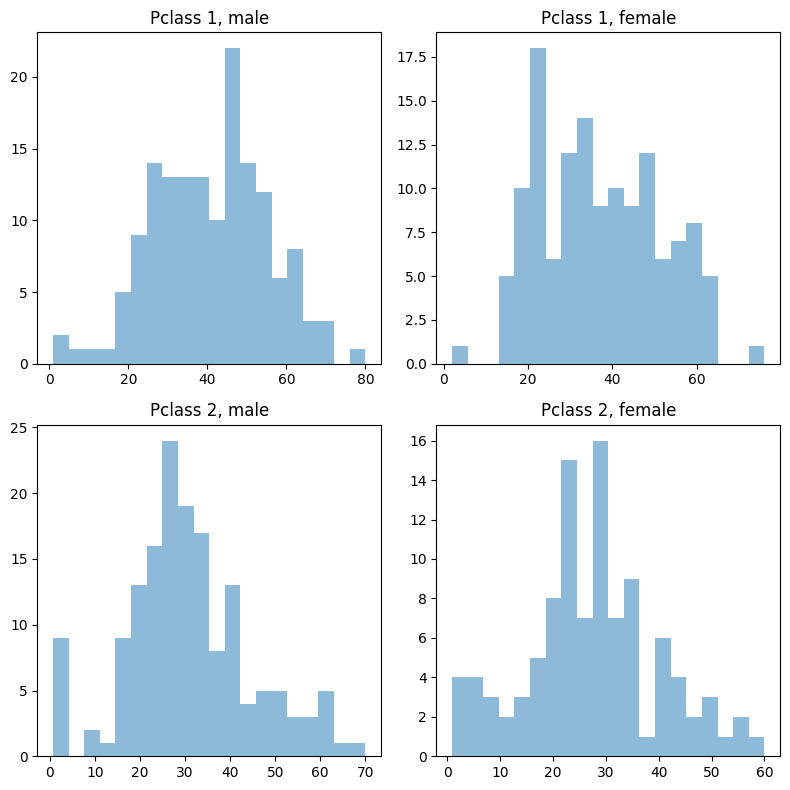

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for i, (pclass, sex) in enumerate([(1, 'male'), (1, 'female'), (2, 'male'), (2, 'female')]):
    ax = axs[i // 2, i % 2]
    subset = df[(df['Pclass'] == pclass) & (df['Sex'] == sex)]
    ax.hist(subset['Age'], alpha=0.5, bins=20)
    ax.set_title(f'Pclass {pclass}, {sex}')

plt.tight_layout()
plt.show()


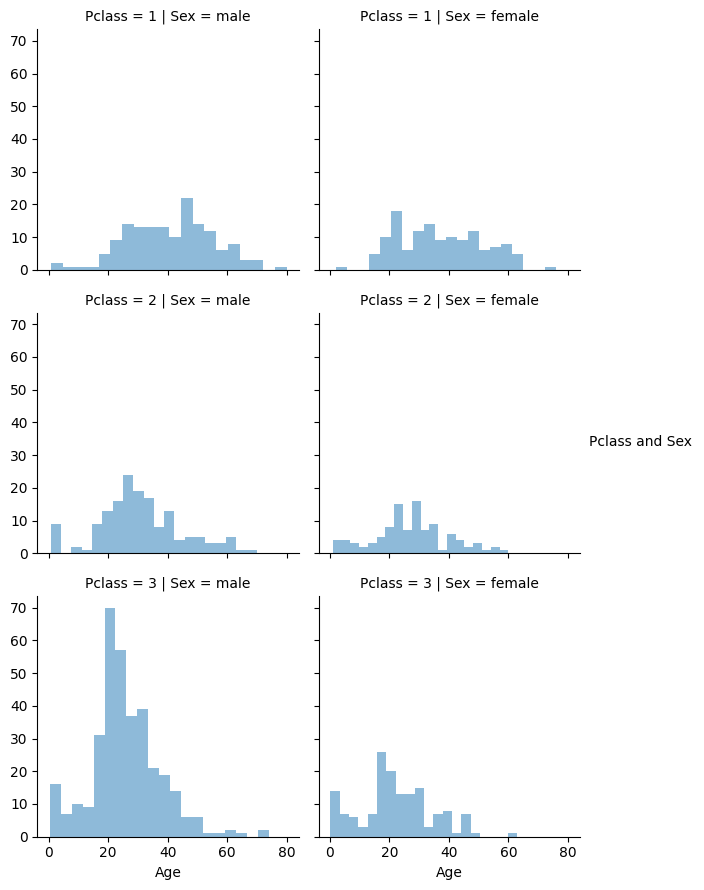

In [ ]:
grid = sns.FacetGrid(df, row = 'Pclass', col = 'Sex')
grid.map(plt.hist, 'Age', alpha = 0.5, bins =20)
grid.add_legend( title='Pclass and Sex')


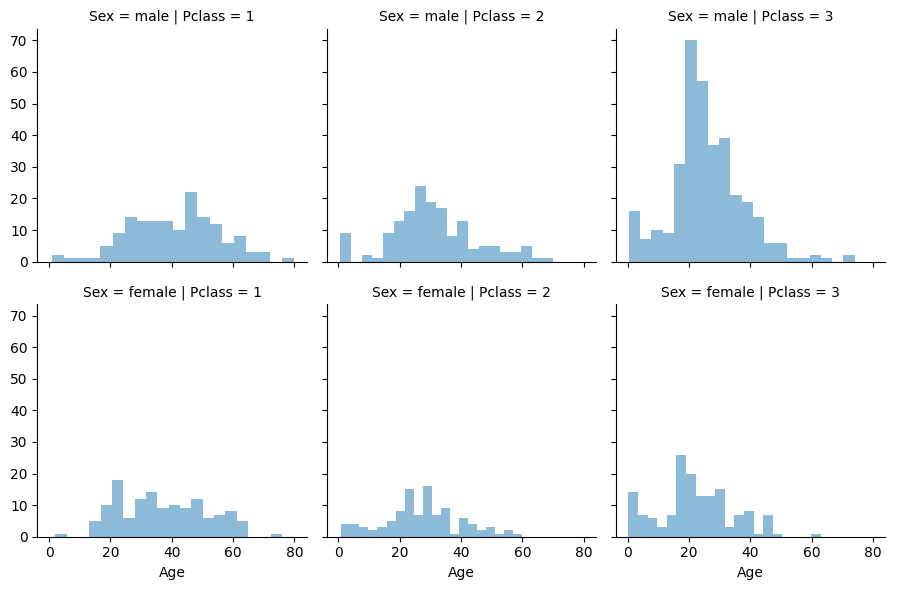

In [ ]:
grid = sns.FacetGrid(df, row = 'Sex', col = 'Pclass')
grid.map(plt.hist, 'Age', bins = 20, alpha = 0.5)
grid.add_legend()

In [ ]:
guess_ages = np.zeros((2, 3))

In [ ]:
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
import numpy as np

# Iterate over each dataset in the combine list
for dataset in combine:
    # Fill missing Age values based on the median Age per Sex and Pclass group
    dataset['Age'] = dataset['Age'].fillna(
        dataset.groupby(['Sex', 'Pclass'])['Age'].transform('median')
    )

    # Convert Age to integer type
    dataset['Age'] = dataset['Age'].astype(int)

    # Display the first few rows of the processed dataset
    print(dataset.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38      1      0   
2                             Heikkinen, Miss. Laina    0   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35      1      0   
4                           Allen, Mr. William Henry    1   35      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
   PassengerId  Pclass    

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
import numpy as np

# Iterate over each dataset in the combine list
for dataset in combine:
    # Fill missing Age values based on the median Age per Sex and Pclass group
    dataset['Age'] = dataset['Age'].fillna(
        dataset.groupby(['Sex', 'Pclass'])['Age'].transform('median')
    )

    # Convert Age to integer type
    dataset['Age'] = dataset['Age'].astype(int)

    # Display the first few rows of the processed dataset
    print(dataset.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38      1      0   
2                             Heikkinen, Miss. Laina    0   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35      1      0   
4                           Allen, Mr. William Henry    1   35      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
   PassengerId  Pclass    

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
print('Value count of Embarked variable in train_df:\n')
print(train_df['Embarked'].value_counts())
print("-"*30)

# Find the mode of train_df['Embarked']
freq_port = train_df.Embarked.dropna().mode()[0]
print('Mode of Embarked variable in train_df: ',freq_port)


Value count of Embarked variable in train_df:

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
------------------------------
Mode of Embarked variable in train_df:  S


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({"S": 1, "C": 2, "Q": 3})

train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,1


In [ ]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().mean(), inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(np.int64)


In [ ]:
for dataset in combine:
    dataset['Title']  = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [ ]:
pd.crosstab(train_df["Title"], test_df['Sex'])


Sex,0,1
Title,,
Don,0,1
Dr,0,3
Master,9,14
Miss,37,64
Mme,0,1
Mr,83,145
Mrs,21,37
Rev,2,1


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
for dataset in combine:
    dataset['Deck'] = dataset['Cabin'].str.slice(0,1)
    dataset['Deck'] = dataset['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F":6,"G":7, "T":8})
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(np.int64)


In [ ]:
print('Columns in df with null values:\n')
print(train_df.isnull().sum())
print("-"*30)

print('Columns in sub_df with null values:\n')
print(test_df.isnull().sum())
print("-"*30)


Columns in df with null values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Deck             0
dtype: int64
------------------------------
Columns in sub_df with null values:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Deck             0
dtype: int64
------------------------------


In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1


In [ ]:
#Binning variable - Fare & Age
for dataset in combine:
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


In [ ]:
for dataset in combine:
  dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
  dataset['AgeBin'] =  pd.cut(dataset['Age'].astype(int), 5)

In [ ]:
combine = [test_df, train_df]

In [ ]:
df.head(110)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,0.0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
106,107,1.0,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
107,108,1.0,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
108,109,0.0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S


In [ ]:
for dataset in combine:
  dataset['combine'] =  pd.qcut(dataset['Fare'], 4)
  dataset['AgeBin'] =  pd.cut(dataset['Age'].astype(int), 5)

##Convert Formats¶
 We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.

In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.



In [ ]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in combine:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(train_df[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 



In [ ]:
print("Rows in train_df:", train_df.shape[0])
print("Rows in test_df:", test_df.shape[0])


Rows in train_df: 891
Rows in test_df: 418


In [ ]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'],axis=1 )

combine = [train_df, test_df]
train_df.shape, test_df.shape


KeyError: "['PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"

In [ ]:
train_df.shape, test_df.shape


((891, 18), (418, 18))

In [ ]:
print("Training  Data :\n")
train_df.head()

Training  Data :



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin,combine,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,1,22,1,0,7,1,1.0,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]","(-0.001, 7.0]",0,1,0,5,0
1,1,1,0,38,1,0,71,2,3.0,3,2,0,"(31.0, 512.0]","(32.0, 48.0]","(31.0, 512.0]",1,2,1,6,3
2,1,3,0,26,0,0,7,1,2.0,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]","(-0.001, 7.0]",1,1,2,5,0
3,1,1,0,35,1,0,53,1,3.0,3,2,0,"(31.0, 512.0]","(32.0, 48.0]","(31.0, 512.0]",1,1,1,6,3
4,0,3,1,35,0,0,8,1,1.0,0,1,1,"(7.0, 14.0]","(32.0, 48.0]","(7.0, 14.0]",0,1,0,6,1


In [ ]:
print("Testing Data :\n")
test_df.head()

Testing Data :



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin,combine,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,892,3,1,34,0,0,7,3,1.0,0,1,1,"(-0.001, 7.0]","(30.4, 45.6]","(-0.001, 7.0]",0,0,0,0,0
1,893,3,0,47,1,0,7,1,3.0,0,2,0,"(-0.001, 7.0]","(45.6, 60.8]","(-0.001, 7.0]",1,1,1,1,0
2,894,2,1,62,0,0,9,3,1.0,0,1,1,"(7.0, 14.0]","(60.8, 76.0]","(7.0, 14.0]",0,0,0,2,1
3,895,3,1,27,0,0,8,1,1.0,0,1,1,"(7.0, 14.0]","(15.2, 30.4]","(7.0, 14.0]",0,1,0,3,1
4,896,3,0,22,1,1,12,1,3.0,0,3,0,"(7.0, 14.0]","(15.2, 30.4]","(7.0, 14.0]",1,1,1,3,1


# EDA (Exploratory Data Analysis) - Analyze, identify patterns, and explore the data Analysis

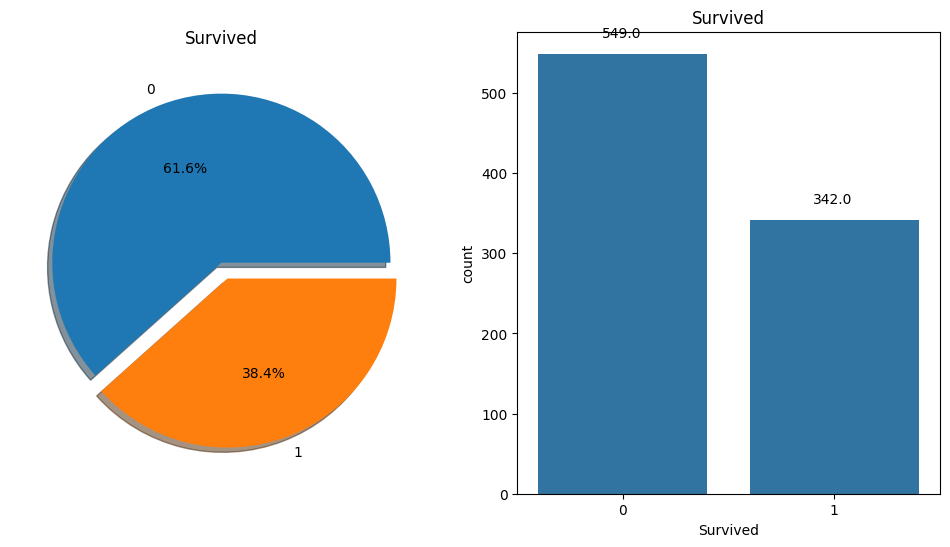

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

f, ax = plt.subplots(1,2, figsize= (12, 6))

train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],   autopct=  '%1.1f%%',   ax=ax[0],shadow=True)

ax[0].set_title('Survived')
ax[0].set_ylabel('')

#Bar chart - count
sns.countplot(x='Survived',data=train_df, ax=ax[1]) # Specify x and use ax[1] for the plot
ax[1].set_title('Survived')

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))


plt.show()

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',data=eda_df, palette='Set2',order=['Upper','Middle','Lower'])
plt.show()


AttributeError: module 'seaborn' has no attribute 'factorplot'

In [ ]:
eda_df = train_df.copy()
eda_df['Sex'] = eda_df['Sex'].map({0: 'male', 1: 'female'})
eda_df['Deck'] =  eda_df['Deck'].map( {0: 'Missing', 1: 'A', 2: 'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'T'} )
eda_df['Embarked'] =  eda_df['Embarked'].map({0: 'Missing',1:'S', 2: 'C', 3 :'Q'})

eda_df['Title'] =  eda_df['Title'].map( {0: 'Missing', 1: 'Mr', 2: 'Miss',3:'Mrs',4:'Master',5:'Rare'} )
# eda_df['Survived'] =  eda_df['Survived'].map( {0: 'No',1:'Yes'} )
eda_df['Pclass'] =  eda_df['Pclass'].map( {0: 'Missing',1:'Upper',2:'Middle',3:'Lower'} )
eda_df['IsAlone'] =  eda_df['IsAlone'].map( {0: 'No',1:'Yes'} )


In [ ]:
import seaborn as sns

fig1 = eda_df.groupby(['Sex', 'Survived'])['Survived'].count().unstack().fillna(0)
fig2  = eda_df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack().fillna(0)
fig3 = eda_df.groupby(['IsAlone', 'Survived'])['Survived'].count().unstack().fillna(0)
fig4 = eda_df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack().fillna(0)

In [ ]:
colors = ['#2471A3', '#F5B041']

def stacked_barchart(fig,ax):
    bottom = np.zeros(len(fig))

    for i, col in enumerate(fig.columns):
        ax.bar(
          fig.index, fig[col], bottom=bottom, label=col, color=colors[i])
        bottom += np.array(fig[col])

    totals = fig.sum(axis=1)
    y_offset = 4
    for i, total in enumerate(totals):
        ax.text(totals.index[i], total + y_offset, round(total), ha='center',
              weight='bold')

    # Let's put the annotations inside the bars themselves by using a
    # negative offset.
    y_offset = -40

    # For each patch (basically each rectangle within the bar), add a label.
    for bar in ax.patches:
        ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height() + bar.get_y() + y_offset,
          # This is actual value we'll show.
          round(bar.get_height()),
          # Center the labels and style them a bit.
          ha='center',
          color='w',
          weight='bold',
          size=8
      )


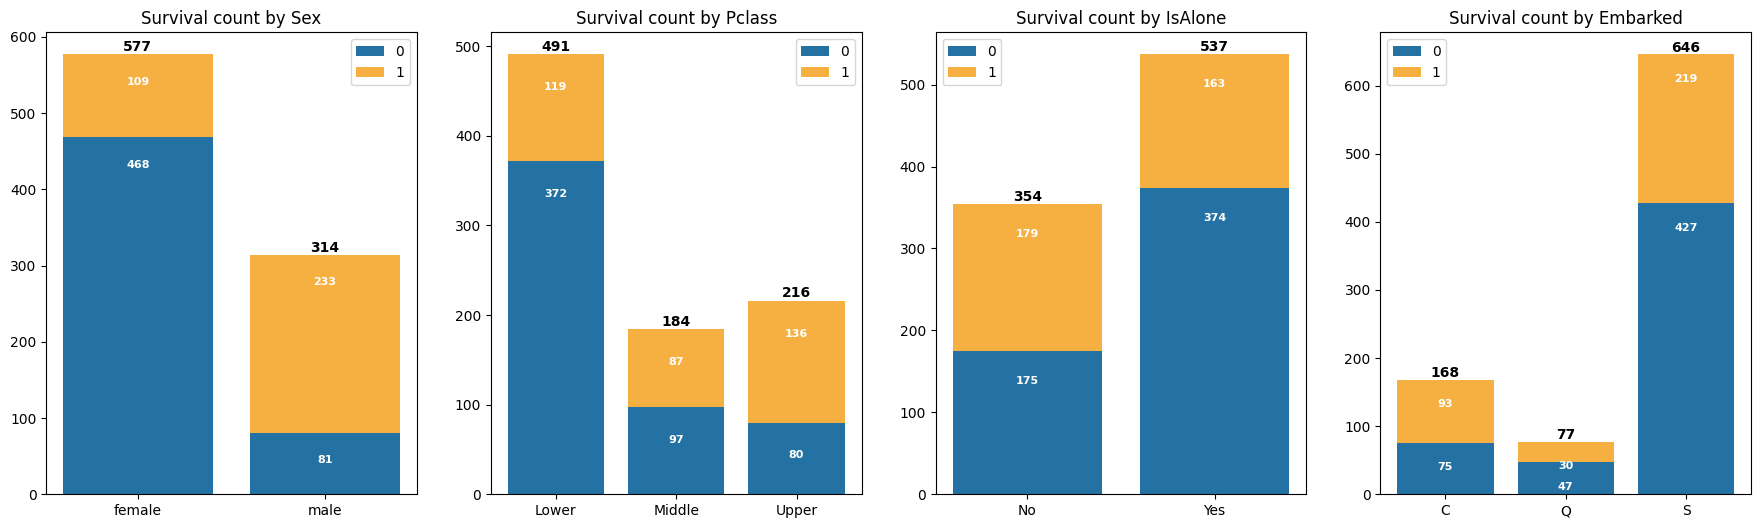

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(22,6))

stacked_barchart(fig1,ax[0])
ax[0].set_title('Survival count by Sex')
ax[0].legend()

stacked_barchart(fig2,ax[1])
ax[1].set_title('Survival count by Pclass')
ax[1].legend()

stacked_barchart(fig3,ax[2])
ax[2].set_title('Survival count by IsAlone')
ax[2].legend()

stacked_barchart(fig4,ax[3])
ax[3].set_title('Survival count by Embarked')
ax[3].legend()

plt.show()


In [ ]:
display(train_df[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze FamilySize feature with survived
display(train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze Pclass feature with survived
display(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze sex feature with survived
display(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze SibSp feature with survived
display(train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze Parch feature with survived
display(train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze IsAlone feature with survived
display(train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False))


<ipython-input-65-94e3b884626b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(train_df[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean().sort_values(by='Survived', ascending=False))


,AgeBin,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Sex,Survived
0,0,0.742038
1,1,0.188908


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
pd.crosstab([eda_df.Sex,eda_df.Survived],eda_df.Pclass,margins=True)


Pclass           Lower  Middle  Upper  All
Sex    Survived                           
female 0           300      91     77  468
       1            47      17     45  109
male   0            72       6      3   81
       1            72      70     91  233
All                491     184    216  891

# Features Correlation with Survived:


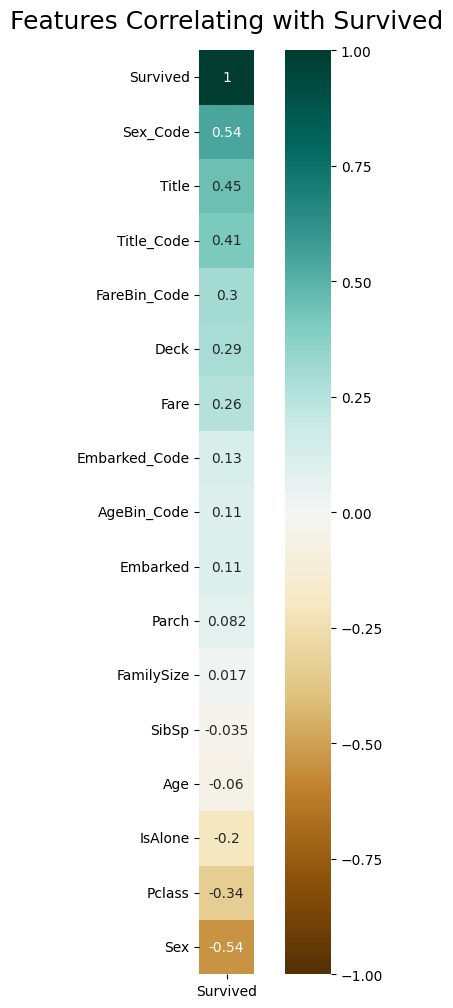

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns from train_df to calculate correlation
numeric_df = train_df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 12))

# Calculate the correlation only with numeric data
heatmap = sns.heatmap(numeric_df.corr()[['Survived']].sort_values(by='Survived', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG', square=True)

heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize': 18}, pad=16)
plt.show()


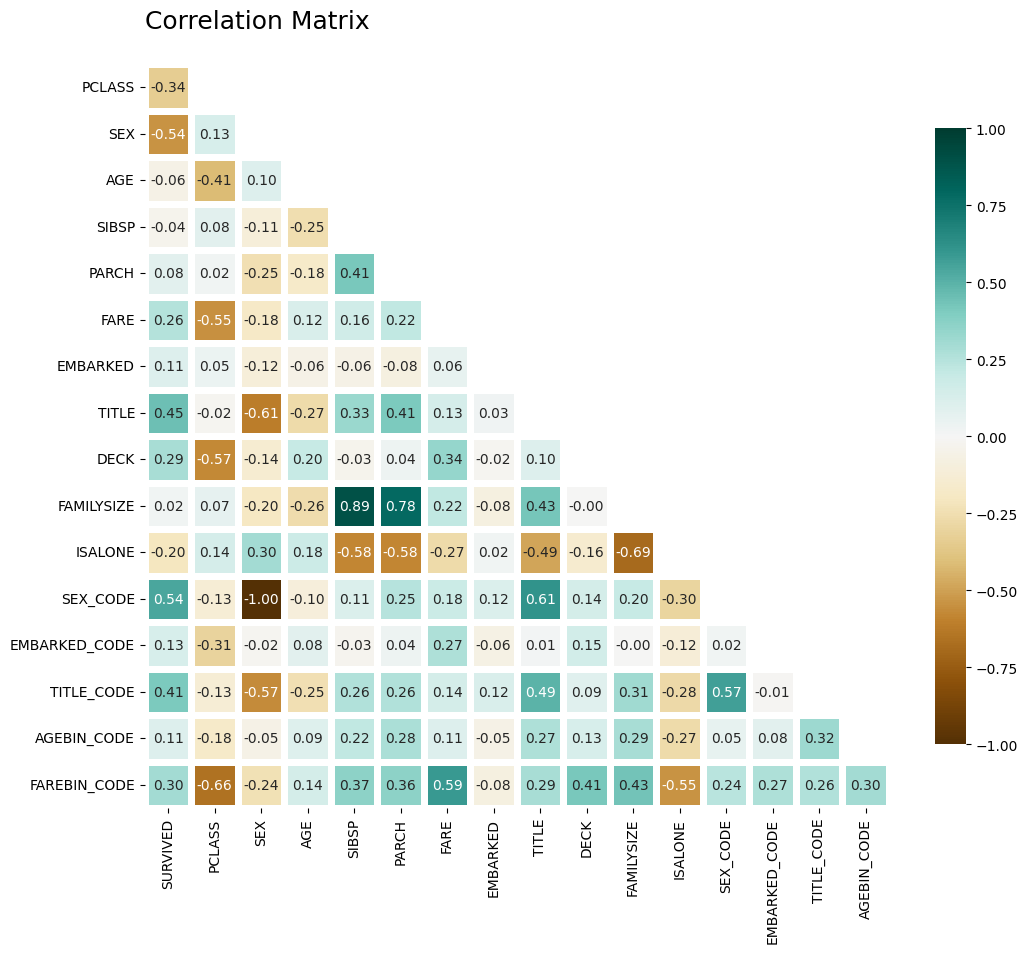

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric data is selected
numeric_df = train_df.select_dtypes(include=[np.number])
df_corr = numeric_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

# Copy the lower triangle correlation matrix
corr = df_corr.iloc[1:, :-1].copy()

# Plot the heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', linewidths=5, cmap='BrBG', vmin=-1, vmax=1, cbar_kws={'shrink': .8}, square=True)

# Set the ticks and title
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
plt.title('Correlation Matrix \n', loc='left', fontsize=18)

plt.show()


In [ ]:

# Correctly dropping 'AgeBin' and 'FareBin' columns from test_df and train_df
test_df = test_df.drop(['AgeBin'], axis=1)
test_df = test_df.drop(['FareBin'], axis=1)

train_df = train_df.drop(['AgeBin'], axis=1)
train_df = train_df.drop(['FareBin'], axis=1)


In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 17), (891,), (418, 17))

In [ ]:
Target = ['Survived']

data_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age','Fare','FamilySize', 'IsAlone' ]
data_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare']
data1_xy  = Target + data1_x
print('Original X Y: ', data1_xy, '\n')

data1_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y:', data1_xy_bin, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y: ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [ ]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(train_df[data1_x_calc], train_df[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(train_df[data1_x_bin], train_df[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], train_df[Target], random_state = 0)


print("Data1 Shape: {}".format(train_df.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()


Data1 Shape: (891, 18)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,0,3,1,0,1,5,0
68,1,3,1,2,7,5,0
253,0,3,1,0,2,5,2
320,0,3,1,0,1,5,0
706,1,2,1,1,1,6,1


In [ ]:
print("train_df[data1_x_calc].shape:", train_df[data1_x_calc].shape)
print("train_df[data1_x_bin].shape:", train_df[data1_x_bin].shape)
print("data1_dummy[data1_x_dummy].shape:", data1_dummy[data1_x_dummy].shape)
print("train_df[Target].shape:", train_df[Target].shape)


train_df[data1_x_calc].shape: (891, 8)
train_df[data1_x_bin].shape: (891, 7)
data1_dummy[data1_x_dummy].shape: (891, 10)
train_df[Target].shape: (891, 1)


In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),


    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = df[Target]

row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_df[data1_x_bin], train_df[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!


    #save MLA predictions - see section 6 for usage
    alg.fit(train_df[data1_x_bin],train_df[Target])
    MLA_predict[MLA_name] = alg.predict(train_df[data1_x_bin])

    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

ValueError: Length of values (891) does not match length of index (1309)

Text(0, 0.5, 'Algorithim')

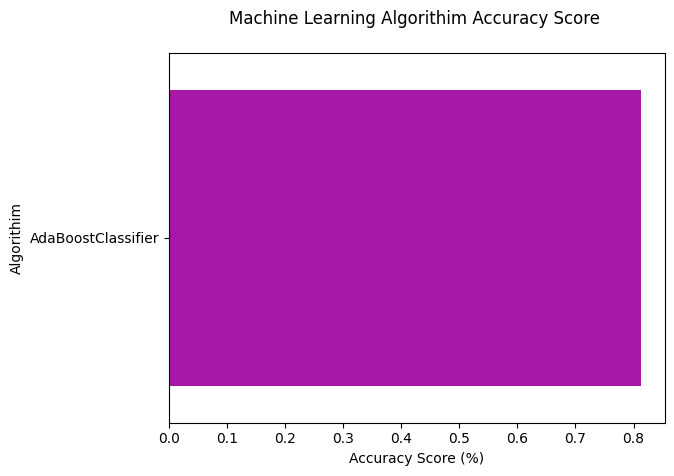

In [ ]:
sns.barplot(x = 'MLA Test Accuracy Mean', y = 'MLA Name', data= MLA_compare, color = 'm')

plt.title('Machine Learning Algorithim Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithim')

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model =  XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:combine: category